In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
bio_df      = pd.read_csv("../Olympic_data/Olympic_Athlete_Bio_Clean.csv")
event_df    = pd.read_csv("../Olympic_data/Olympic_Athlete_Event_Results_Clean.csv")
result_df   = pd.read_csv("../Olympic_data/Olympic_Results.csv")
game_df     = pd.read_csv("../Olympic_data/Olympics_Games.csv")
country_df  = pd.read_csv("../Olympic_data/Olympics_Country.csv")
medal_df    = pd.read_csv("../Olympic_data/Olympic_Games_Medal_Tally.csv")

In [3]:
del bio_df["Unnamed: 0"]

In [4]:
event_df = event_df.loc[event_df["sport"] == "Swimming"]
del event_df["Unnamed: 0"]

In [5]:
swimBioEvent_df = pd.merge(bio_df,event_df,on="athlete_id")
swimNotTeam_df = swimBioEvent_df.loc[swimBioEvent_df["isTeamSport"] == False]
swimNotTeam_df = swimNotTeam_df.loc[swimNotTeam_df["weight"] != "58-73"]
swimNotTeam_df = swimNotTeam_df.loc[swimNotTeam_df["weight"] != "75-80"]
swimNotTeam_df["BMI"] = swimNotTeam_df["weight"].astype(float)/((swimNotTeam_df["height"]/100)**2)
swimMedal = swimNotTeam_df[["medal","BMI","height","weight"]]
swimMedal["weight"] = swimMedal["weight"].astype(float)
swimMedalMean = swimMedal.groupby("medal").mean()
swimMedalMax = swimMedal.groupby("medal").max()
swimMedalMin = swimMedal.groupby("medal").min()
swimMedal2 = pd.merge(swimMedalMean,swimMedalMax,on="medal")
swimMedal2 = pd.merge(swimMedal2,swimMedalMin,on="medal")
swimMedal2 = swimMedal2.rename(columns={"BMI_x":"BMI Mean","height_x":"Height Mean","weight_x":"Weight Mean","BMI_y":"BMI Max","height_y":"Height Max","weight_y":"Weight Max","BMI":"BMI Min","height":"Height Min","weight":"Weight Min"})
swimMedal2

C:\Users\kylec\AppData\Local\Temp\ipykernel_17244\3281018197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimMedal["weight"] = swimMedal["weight"].astype(float)


,BMI Mean,Height Mean,Weight Mean,BMI Max,Height Max,Weight Max,BMI Min,Height Min,Weight Min
medal,,,,,,,,,
Bronze,22.103944,179.250660,71.403694,38.954294,203.0,104.0,17.916331,150.0,48.0
Gold,22.115305,181.164062,73.028646,28.125000,203.0,105.0,17.855321,159.0,49.0
Silver,22.143535,180.841969,72.813472,38.954294,203.0,105.0,17.577069,152.0,48.0


In [6]:
bins = [150,160,170,180,190,200,210]
labels = ["150-160","160-170","170-180","180-190","190-200","200-210"]
swimMedal['height bin'] = pd.cut(swimMedal['height'],bins=bins,labels=labels)

C:\Users\kylec\AppData\Local\Temp\ipykernel_17244\2478423154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimMedal['height bin'] = pd.cut(swimMedal['height'],bins=bins,labels=labels)


In [7]:
swimMedal

,medal,BMI,height,weight,height bin
0,Bronze,23.120624,174.0,70.0,170-180
1,Silver,23.120624,174.0,70.0,170-180
2,Gold,17.998163,165.0,49.0,160-170
6,Bronze,23.095409,179.0,74.0,170-180
7,Bronze,21.224490,175.0,65.0,170-180
...,...,...,...,...,...
2593,Bronze,21.847009,179.0,70.0,170-180
2594,Bronze,21.847009,179.0,70.0,170-180
2596,Bronze,24.507401,202.0,100.0,200-210
2601,Silver,20.381570,173.0,61.0,170-180


Best fit slope = 27.74, intercept = -18.17
SEM value for BMI is 0.06
SEM value for weight is 0.34


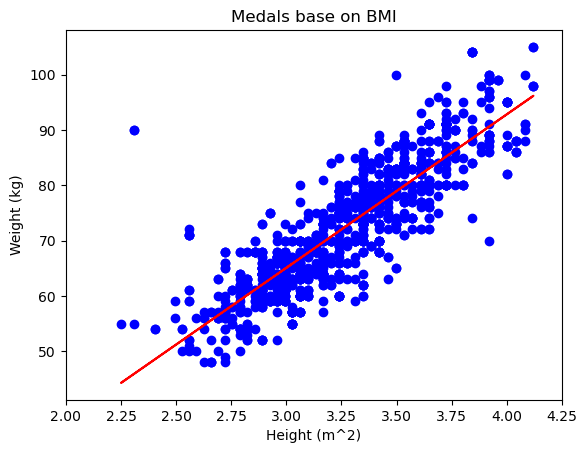

In [8]:
x = swimMedal["weight"]
y = (swimMedal["height"]/100)**2
s,b,rv,pv,ster = st.linregress(y,x)
fit = s*y + b

plt.scatter(x=y,y=x,c='blue')
plt.plot(y,fit,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI")
plt.xlim(2,4.25)
print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimMedal["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimMedal["weight"]),2)}")
plt.show()

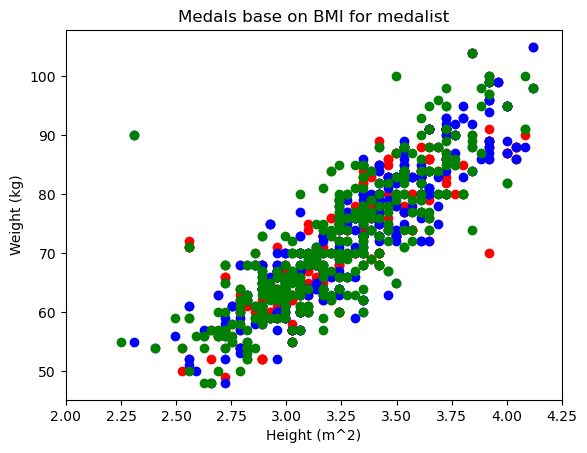

In [13]:
swimGold = swimMedal.loc[swimMedal["medal"] == "Gold"]
xG = swimGold["weight"]
yG = (swimGold["height"]/100)**2
swimSilv = swimMedal.loc[swimMedal["medal"] == "Silver"]
xS = swimSilv["weight"]
yS = (swimSilv["height"]/100)**2
swimBron = swimMedal.loc[swimMedal["medal"] == "Bronze"]
xB = swimBron["weight"]
yB = (swimBron["height"]/100)**2
plt.scatter(x=yG,y=xG,c='red')
plt.scatter(x=yS,y=xS,c='blue')
plt.scatter(x=yB,y=xB,c='green')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI for medalist")
plt.xlim(2,4.25)
plt.savefig("output/overallMedalBMI.png")
plt.show()

Best fit slope = 28.77, intercept = -21.66
SEM value for BMI is 0.1
SEM value for weight is 0.6


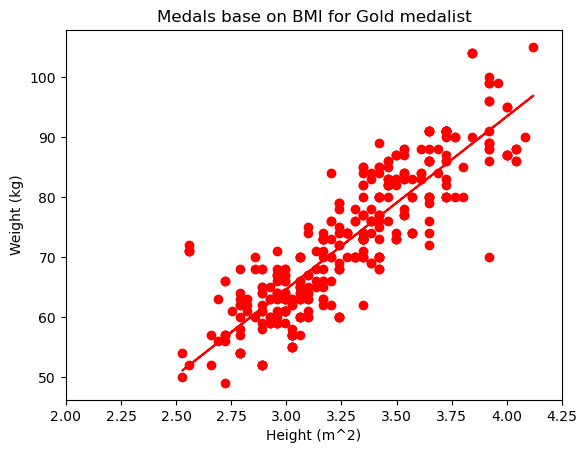

In [14]:
swimGold = swimMedal.loc[swimMedal["medal"] == "Gold"]
xG = swimGold["weight"]
yG = (swimGold["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yG,xG)
fitG = s*yG + b

plt.scatter(x=yG,y=xG,c='red')
plt.plot(yG,fitG,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI for Gold medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimGold["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimGold["weight"]),2)}")
plt.savefig("output/goldMedalBMI.png")
plt.show()


Best fit slope = 27.66, intercept = -17.92
SEM value for BMI is 0.1
SEM value for weight is 0.58


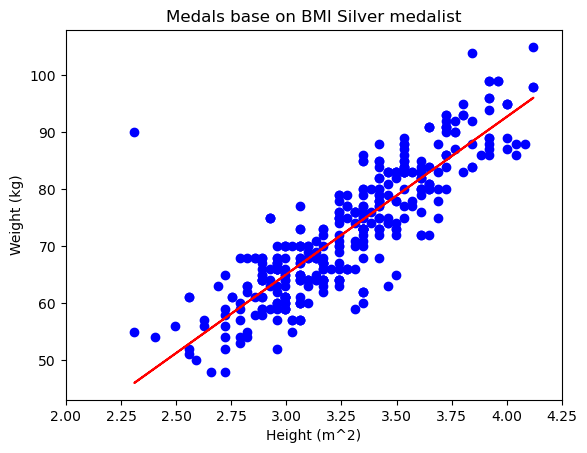

In [ ]:
swimSilv = swimMedal.loc[swimMedal["medal"] == "Silver"]
xS = swimSilv["weight"]
yS = (swimSilv["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yS,xS)
fitS = s*yS + b

plt.scatter(x=yS,y=xS,c='silver')
plt.plot(yS,fitS,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Silver medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimSilv["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimSilv["weight"]),2)}")
plt.savefig("output/silverMedalBMI.png")
plt.show()

Best fit slope = 26.89, intercept = -15.25
SEM value for BMI is 0.11
SEM value for weight is 0.59


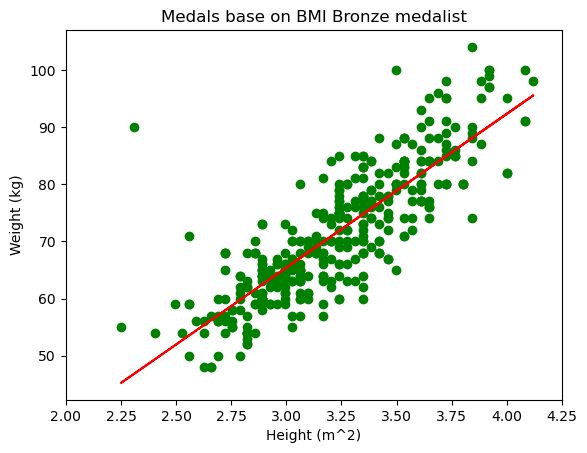

In [ ]:
swimBron = swimMedal.loc[swimMedal["medal"] == "Bronze"]
xB = swimBron["weight"]
yB = (swimBron["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yB,xB)
fitB = s*yB + b

plt.scatter(x=yB,y=xB,c='orange')
plt.plot(yB,fitB,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Bronze medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimBron["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimBron["weight"]),2)}")
plt.savefig("output/bronzeMedalBMI.png")
plt.show()

Best fit slope = 28.78, intercept = -21.72
SEM value for BMI is 0.05
SEM value for weight is 0.34


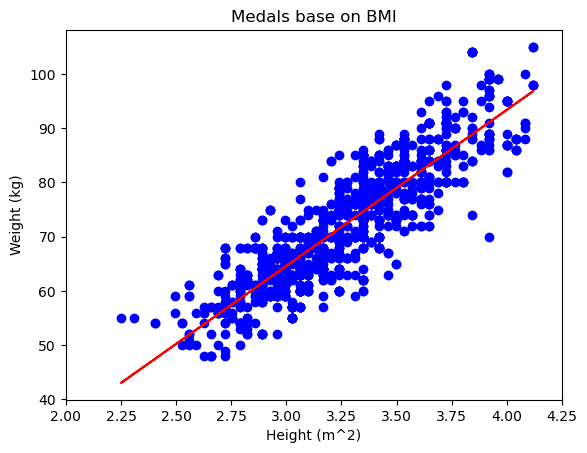

In [ ]:
mean = swimMedal["BMI"].mean()
Q1 = swimMedal["BMI"].quantile(0.25)
Q3 = swimMedal["BMI"].quantile(0.75)
IQR = Q3 - Q1

inSwimMedal = swimMedal.loc[(swimMedal["BMI"] >= Q1 - 1.5*IQR)&(swimMedal["BMI"] <= Q3 + 1.5*IQR)]
x = inSwimMedal["weight"]
y = (inSwimMedal["height"]/100)**2
s,b,rv,pv,ster = st.linregress(y,x)
fit = s*y + b

plt.scatter(x=y,y=x,c='blue')
plt.plot(y,fit,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(inSwimMedal["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(inSwimMedal["weight"]),2)}")

plt.show()


Best fit slope = 30.02, intercept = -26.0
SEM value for BMI is 0.09
SEM value for weight is 0.6


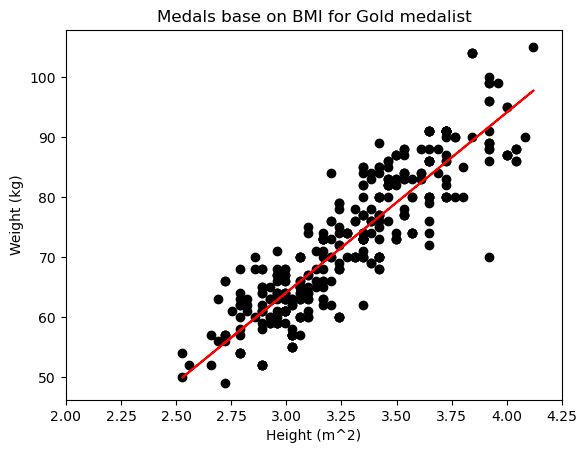

In [ ]:
swimGold = inSwimMedal.loc[inSwimMedal["medal"] == "Gold"]
xG = swimGold["weight"]
yG = (swimGold["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yG,xG)
fitG = s*yG + b

plt.scatter(x=yG,y=xG,c='black')
plt.plot(yG,fitG,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI for Gold medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimGold["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimGold["weight"]),2)}")
plt.savefig("output/goldOutMedalBMI.png")
plt.show()

Best fit slope = 28.57, intercept = -21.01
SEM value for BMI is 0.09
SEM value for weight is 0.58


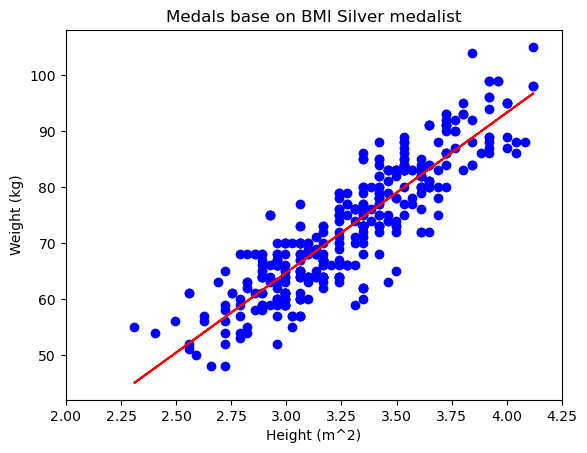

In [ ]:
swimSilv = inSwimMedal.loc[inSwimMedal["medal"] == "Silver"]
xS = swimSilv["weight"]
yS = (swimSilv["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yS,xS)
fitS = s*yS + b

plt.scatter(x=yS,y=xS,c='blue')
plt.plot(yS,fitS,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Silver medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimSilv["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimSilv["weight"]),2)}")
plt.savefig("output/silverOutMedalBMI.png")
plt.show()

Best fit slope = 27.86, intercept = -18.61
SEM value for BMI is 0.1
SEM value for weight is 0.59


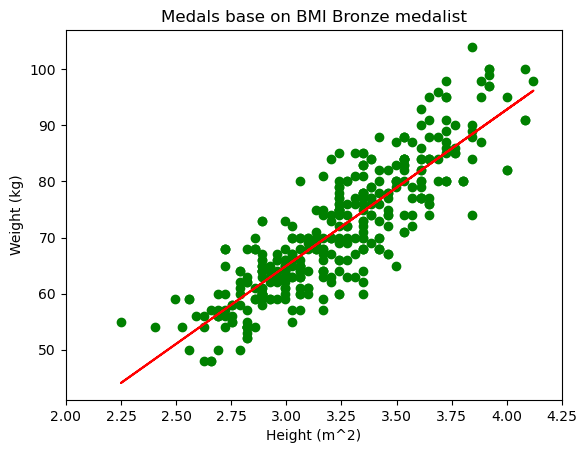

In [ ]:
swimBron = inSwimMedal.loc[inSwimMedal["medal"] == "Bronze"]
xB = swimBron["weight"]
yB = (swimBron["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yB,xB)
fitB = s*yB + b

plt.scatter(x=yB,y=xB,c='green')
plt.plot(yB,fitB,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Bronze medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}, intercept = {round(b,2)}")
print(f"SEM value for BMI is {round(st.sem(swimBron["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimBron["weight"]),2)}")
plt.savefig("output/bronzeOutMedalBMI.png")
plt.show()

In [ ]:
st.f_oneway(swimGold["BMI"],swimSilv["BMI"],swimBron["BMI"])

F_onewayResult(statistic=0.15909052497608897, pvalue=0.8529381110925497)

In [ ]:
st.f_oneway(swimGold["weight"],swimSilv["weight"],swimBron["weight"])

F_onewayResult(statistic=2.6023248205088434, pvalue=0.07454203914947226)

In [ ]:
st.f_oneway(swimGold["height"],swimSilv["height"],swimBron["height"])

F_onewayResult(statistic=4.588180026394639, pvalue=0.010360235801120832)

In [ ]:
swimGold['height bin'].value_counts().sort_index()

height bin
150-160      3
160-170     46
170-180    134
180-190    117
190-200     73
200-210      7
Name: count, dtype: int64

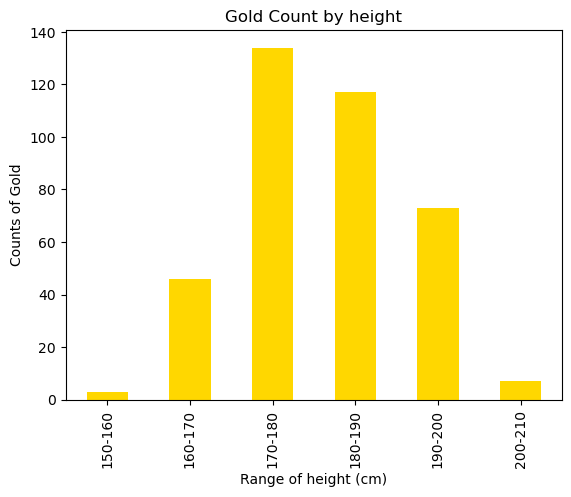

In [ ]:
swimGold['height bin'].value_counts().sort_index().plot(kind='bar',color='gold')
plt.ylabel('Counts of Gold')
plt.xlabel('Range of height (cm)')
plt.title('Gold Count by height')
plt.show()

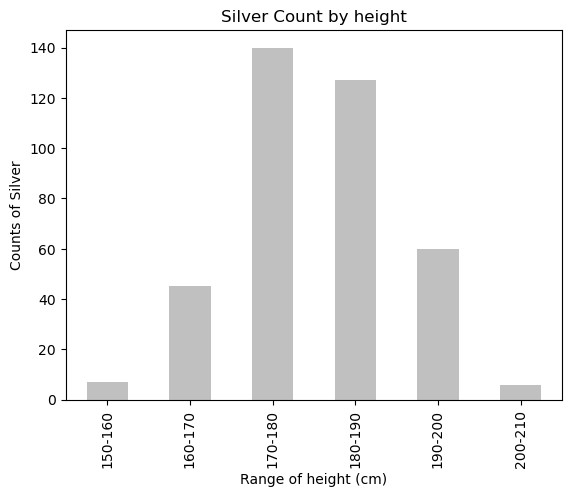

In [ ]:
swimSilv['height bin'].value_counts().sort_index().plot(kind='bar',color='silver')
plt.ylabel('Counts of Silver')
plt.xlabel('Range of height (cm)')
plt.title('Silver Count by height')
plt.show()

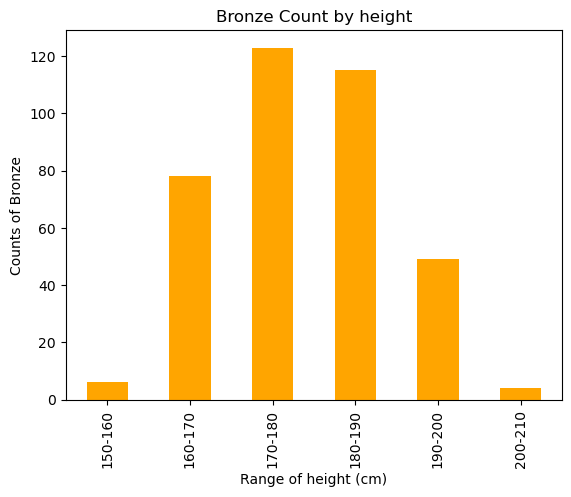

In [ ]:
swimBron['height bin'].value_counts().sort_index().plot(kind='bar',color='orange')
plt.ylabel('Counts of Bronze')
plt.xlabel('Range of height (cm)')
plt.title('Bronze Count by height')
plt.show()